In [1]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
import time
import warnings
warnings.filterwarnings("ignore")

In [2]:
d=pd.read_excel("Book3.xlsx")

In [3]:
d.head()

,DATE,TRADING CODE,LTP,HIGH,LOW,OPENP,CLOSEP,YCP,TRADE,VALUE (mn),VOLUME
0,2018-08-16,1JANATAMF,6.2,6.3,6.1,6.2,6.2,6.2,56,0.757,122741
1,2018-08-16,1STPRIMFMF,11.2,11.2,10.9,11.0,11.1,10.9,145,2.640,238810
2,2018-08-16,AAMRANET,80.1,80.4,78.5,78.5,79.7,78.3,545,15.488,195035
3,2018-08-16,AAMRATECH,30.8,31.6,30.7,31.0,30.9,31.0,195,5.100,164899
4,2018-08-16,ABB1STMF,6.1,6.1,5.9,6.0,6.1,6.0,109,11.214,1857588


In [4]:
d.rename(columns=lambda x: x.strip(), inplace=True)

In [5]:
# clear the instrument names
d['TRADING CODE']=d['TRADING CODE'].str.strip()

In [6]:

da=d[(d['TRADING CODE']=='GP')].sort_values('DATE', ascending=False).reset_index(drop=True)
da=da[da['TRADE']!=0]

In [7]:
da.head()

,DATE,TRADING CODE,LTP,HIGH,LOW,OPENP,CLOSEP,YCP,TRADE,VALUE (mn),VOLUME
0,2018-11-29,GP,361.5,366.7,361.3,366.7,362.7,367.4,690,45.435,124898
1,2018-11-28,GP,365.0,369.2,365.0,366.2,367.4,366.0,792,37.528,102185
2,2018-11-27,GP,367.0,367.4,361.0,362.8,366.0,361.6,745,34.835,95714
3,2018-11-26,GP,363.0,364.3,360.0,361.1,361.6,361.6,788,44.601,123240
4,2018-11-25,GP,363.0,364.5,360.0,364.5,361.6,364.1,764,47.261,130643


Text(0.5, 1.0, 'Time Series Plot of GP')

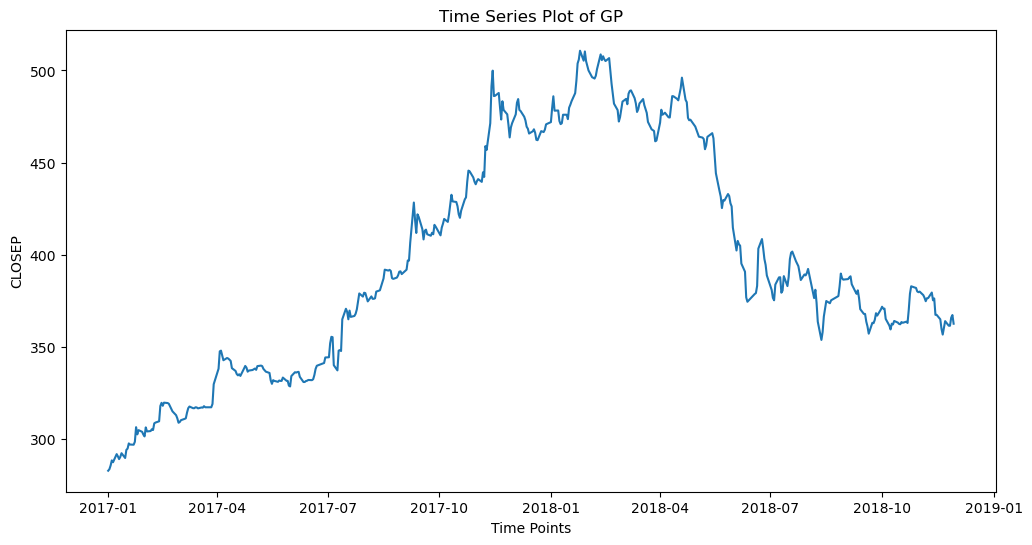

In [8]:
plt.figure(figsize=(12,6))
plt.plot(da['DATE'], da['CLOSEP'])
plt.xlabel('Time Points')
plt.ylabel('CLOSEP')
plt.title('Time Series Plot of '+da.loc[1, 'TRADING CODE'])

In [9]:
import plotly as py
import plotly.graph_objects as go
from datetime import datetime
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode(connected=True)
trace = go.Candlestick(x=da['DATE'],
                       open=da['OPENP'],
                       high=da['HIGH'],
                       low=da['LOW'],
                       close=da['CLOSEP'])

dat=[trace]
iplot(dat)

C:\Users\AKHILA\anaconda3\Lib\site-packages\mpl_finance.py:16: DeprecationWarning:





    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/





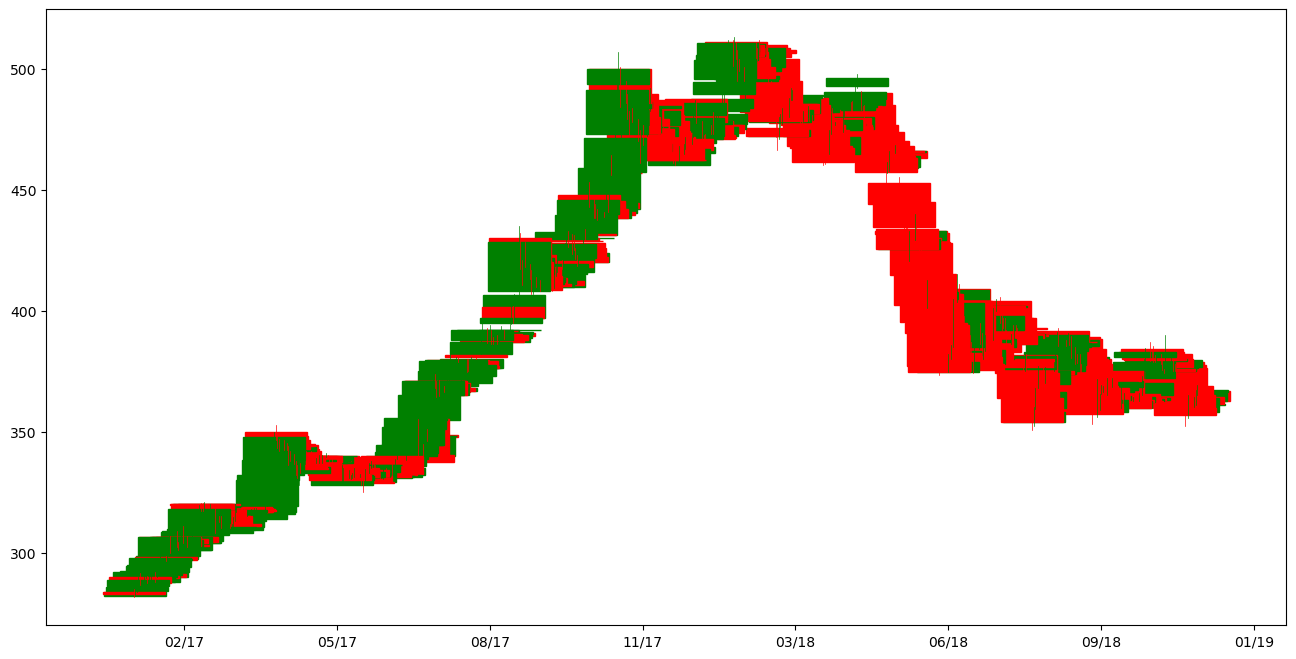

In [10]:
# Candlestick chart with matplotlib
!pip install mpl_finance
import mpl_finance
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
# Converting date to pandas datetime format
da['DATE'] = pd.to_datetime(da['DATE'])
da['DATE'] = da['DATE'].apply(mdates.date2num)
ohlc= da[['DATE', 'OPENP','HIGH','LOW','CLOSEP']]
f1, ax = plt.subplots(figsize = (16,8))
candlestick_ohlc(ax, ohlc.values, width=40.6, colorup='green', colordown='red')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))

In [11]:

%matplotlib inline

sns.set(style='darkgrid', context='talk', palette='Dark2')
my_year_month_fmt = mdates.DateFormatter('%m/%y')
data_1 = pd.read_excel('Book3.xlsx',index_col=[0,1,2,3,4])
data_1.head(10)

OPENP  CLOSEP   YCP   TRADE   \
DATE       TRADING CODE  LTP   HIGH  LOW                                   
2018-08-16 1JANATAMF     6.2   6.3   6.1      6.2     6.2    6.2      56   
           1STPRIMFMF    11.2  11.2  10.9    11.0    11.1   10.9     145   
           AAMRANET      80.1  80.4  78.5    78.5    79.7   78.3     545   
           AAMRATECH     30.8  31.6  30.7    31.0    30.9   31.0     195   
           ABB1STMF      6.1   6.1   5.9      6.0     6.1    6.0     109   
           ABBANK        12.9  12.9  12.6    12.6    12.8   12.5     225   
           ACFL          57.3  63.5  56.6    63.0    57.0   62.6    3639   
           ACI           363.8 365.3 362.7  362.7   363.0  362.5     317   
           ACIFORMULA    160.3 162.0 159.0  159.2   160.5  158.8      66   
           ACMELAB       90.5  91.6  90.5    90.5    90.8   90.3     206   

                                            VALUE (mn)    VOLUME  
DATE       TRADING CODE  LTP   HIGH  LOW                          
2018-08-16 1JANATAMF     6.2   6.3   6.1          0.757   122741  
           1STPRIMFMF    11.2  11.2  10.9         2.640   238810  
           AAMRANET      80.1  80.4  78.5        15.488   195035  
           AAMRATECH     30.8  31.6  30.7         5.100   164899  
           ABB1STMF      6.1   6.1   5.9         11.214  1857588  
           ABBANK        12.9  12.9  12.6         4.219   331263  
           ACFL          57.3  63.5  56.6        96.005  1614223  
           ACI           363.8 365.3 362.7        7.019    19317  
           ACIFORMULA    160.3 162.0 159.0        1.575     9825  
           ACMELAB       90.5  91.6  90.5         5.015    55155

In [12]:
short_rolling = data_1.rolling(window=20).mean()
short_rolling.head(20)

OPENP  CLOSEP  YCP   TRADE   \
DATE       TRADING CODE  LTP   HIGH  LOW                                  
2018-08-16 1JANATAMF     6.2   6.3   6.1      NaN     NaN   NaN     NaN   
           1STPRIMFMF    11.2  11.2  10.9     NaN     NaN   NaN     NaN   
           AAMRANET      80.1  80.4  78.5     NaN     NaN   NaN     NaN   
           AAMRATECH     30.8  31.6  30.7     NaN     NaN   NaN     NaN   
           ABB1STMF      6.1   6.1   5.9      NaN     NaN   NaN     NaN   
           ABBANK        12.9  12.9  12.6     NaN     NaN   NaN     NaN   
           ACFL          57.3  63.5  56.6     NaN     NaN   NaN     NaN   
           ACI           363.8 365.3 362.7    NaN     NaN   NaN     NaN   
           ACIFORMULA    160.3 162.0 159.0    NaN     NaN   NaN     NaN   
           ACMELAB       90.5  91.6  90.5     NaN     NaN   NaN     NaN   
           ACTIVEFINE    38.2  38.6  37.1     NaN     NaN   NaN     NaN   
           ADVENT        36.9  37.3  36.5     NaN     NaN   NaN     NaN   
           AFCAGRO       39.6  40.2  38.7     NaN     NaN   NaN     NaN   
           AFTABAUTO     53.7  53.7  52.8     NaN     NaN   NaN     NaN   
           AGNISYSL      22.1  22.7  21.9     NaN     NaN   NaN     NaN   
           AGRANINS      17.7  18.4  17.2     NaN     NaN   NaN     NaN   
           AIBL1STIMF    7.6   7.6   7.6      NaN     NaN   NaN     NaN   
           AIL           86.6  88.0  84.4     NaN     NaN   NaN     NaN   
           AL-HAJTEX     76.9  77.7  76.5     NaN     NaN   NaN     NaN   
           ALARABANK     21.3  21.5  20.6   60.87   60.93  60.7  514.05   

                                            VALUE (mn)      VOLUME  
DATE       TRADING CODE  LTP   HIGH  LOW                            
2018-08-16 1JANATAMF     6.2   6.3   6.1            NaN        NaN  
           1STPRIMFMF    11.2  11.2  10.9           NaN        NaN  
           AAMRANET      80.1  80.4  78.5           NaN        NaN  
           AAMRATECH     30.8  31.6  30.7           NaN        NaN  
           ABB1STMF      6.1   6.1   5.9            NaN        NaN  
           ABBANK        12.9  12.9  12.6           NaN        NaN  
           ACFL          57.3  63.5  56.6           NaN        NaN  
           ACI           363.8 365.3 362.7          NaN        NaN  
           ACIFORMULA    160.3 162.0 159.0          NaN        NaN  
           ACMELAB       90.5  91.6  90.5           NaN        NaN  
           ACTIVEFINE    38.2  38.6  37.1           NaN        NaN  
           ADVENT        36.9  37.3  36.5           NaN        NaN  
           AFCAGRO       39.6  40.2  38.7           NaN        NaN  
           AFTABAUTO     53.7  53.7  52.8           NaN        NaN  
           AGNISYSL      22.1  22.7  21.9           NaN        NaN  
           AGRANINS      17.7  18.4  17.2           NaN        NaN  
           AIBL1STIMF    7.6   7.6   7.6            NaN        NaN  
           AIL           86.6  88.0  84.4           NaN        NaN  
           AL-HAJTEX     76.9  77.7  76.5           NaN        NaN  
           ALARABANK     21.3  21.5  20.6        19.258  540801.85

In [13]:
# Calculating the long-window simple moving average
long_rolling = data_1.rolling(window=100).mean()
long_rolling.tail()

,,,,,OPENP,CLOSEP,YCP,TRADE,VALUE (mn),VOLUME
DATE,TRADING CODE,LTP,HIGH,LOW,,,,,,
2018-11-08,ZEALBANGLA,35.6,35.6,33.0,51.340,53.316,51.600,446.58,15.20717,608312.83
2018-11-07,ZEALBANGLA,32.8,33.5,31.9,46.483,48.684,47.072,427.38,14.47438,606906.98
2018-11-06,ZEALBANGLA,32.0,32.8,32.0,42.305,44.156,42.941,414.36,13.66780,605255.53
2018-11-05,ZEALBANGLA,33.5,35.0,31.9,38.233,40.025,38.843,398.16,13.05698,603933.56
2018-11-04,ZEALBANGLA,33.9,34.1,31.0,34.452,35.927,35.059,384.60,12.59389,602895.04


In [14]:
 
da['HIGH-LOW']=da['HIGH']-da['LOW']
da['CLOSEP-OPENP']=da['CLOSEP']-da['OPENP']

Text(0.5, 1.0, 'Histogram of CLOSEP-OPENP')

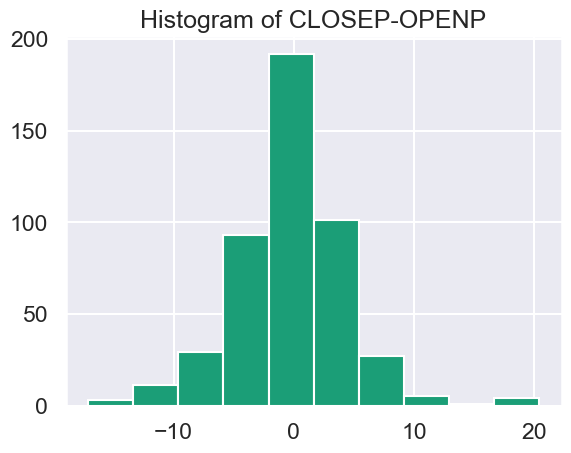

In [15]:
 
plt.hist(da['CLOSEP-OPENP'])
plt.title('Histogram of CLOSEP-OPENP')

In [16]:
da['CLOSEP']=da['CLOSEP'].astype('float64')

In [17]:
 
da['Y']=da['CLOSEP'][1:]/da['CLOSEP'][:-1].values-1

In [18]:
da.head()

,DATE,TRADING CODE,LTP,HIGH,LOW,OPENP,CLOSEP,YCP,TRADE,VALUE (mn),VOLUME,HIGH-LOW,CLOSEP-OPENP,Y
0,17864.0,GP,361.5,366.7,361.3,366.7,362.7,367.4,690,45.435,124898,5.4,-4.0,NaN
1,17863.0,GP,365.0,369.2,365.0,366.2,367.4,366.0,792,37.528,102185,4.2,1.2,0.012958
2,17862.0,GP,367.0,367.4,361.0,362.8,366.0,361.6,745,34.835,95714,6.4,3.2,-0.003811
3,17861.0,GP,363.0,364.3,360.0,361.1,361.6,361.6,788,44.601,123240,4.3,0.5,-0.012022
4,17860.0,GP,363.0,364.5,360.0,364.5,361.6,364.1,764,47.261,130643,4.5,-2.9,0.000000


In [19]:
 
da.loc[da['Y']>0, 'DEX']=1
da.loc[da['Y']<=0, 'DEX']=-1

 
da['DEX']=da['DEX'].shift(-1)
da.head()
da.tail()

,DATE,TRADING CODE,LTP,HIGH,LOW,OPENP,CLOSEP,YCP,TRADE,VALUE (mn),VOLUME,HIGH-LOW,CLOSEP-OPENP,Y,DEX
466,17171.0,GP,288.0,291.7,286.5,290.0,287.6,288.6,656,76.176,263372,5.2,-2.4,-0.015068,1.0
467,17170.0,GP,288.0,289.9,286.1,286.1,288.6,285.8,895,123.801,431195,3.8,2.5,0.003477,-1.0
468,17169.0,GP,284.0,287.0,283.5,284.0,285.8,283.8,772,145.994,510520,3.5,1.8,-0.009702,-1.0
469,17168.0,GP,284.8,286.0,282.0,282.0,283.8,283.0,697,59.162,207796,4.0,1.8,-0.006998,-1.0
470,17167.0,GP,281.5,285.0,281.5,283.5,283.0,284.1,351,23.074,81413,3.5,-0.5,-0.002819,NaN


Text(0, 0.5, 'Count')

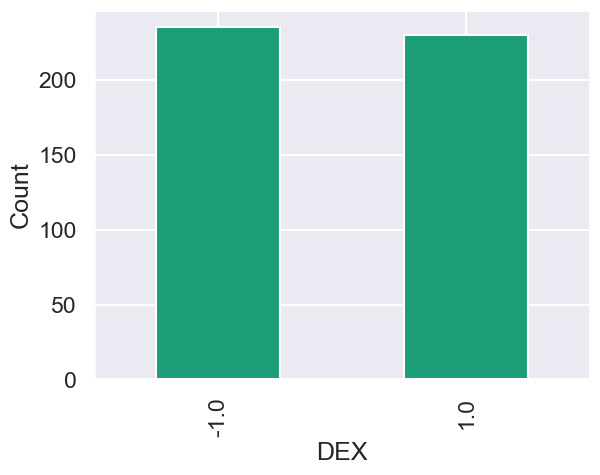

In [20]:
 
da.groupby(['DEX'])['CLOSEP'].count().plot(kind='bar')
plt.ylabel('Count')

In [21]:
 
da=da.dropna()

In [22]:
y=da['DEX']
X=da[['CLOSEP-OPENP', 'HIGH-LOW']]

In [23]:
pc=.90
j=int(pc*len(da['DEX']))

In [24]:
 
X_train=X[:j]
X_test=X[j:]

In [25]:
 
y_train=y[:j]
y_test=y[j:]

In [26]:
X_train

,CLOSEP-OPENP,HIGH-LOW
1,1.2,4.2
2,3.2,6.4
3,0.5,4.3
4,-2.9,4.5
5,5.9,9.4
...,...,...
417,1.6,2.0
418,-0.5,4.6
419,-0.5,3.7
420,-1.5,4.8


In [27]:
y_train

1     -1.0
2     -1.0
3     -1.0
4      1.0
5     -1.0
      ... 
417    1.0
418    1.0
419   -1.0
420   -1.0
421    1.0
Name: DEX, Length: 417, dtype: float64

In [28]:
 
dex=SVC().fit(X_train, y_train)

In [29]:
 
y_pred=dex.predict(X_test)


In [30]:
 
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, y_pred)


array([[27,  1],
       [ 8, 11]], dtype=int64)

In [31]:
ac=accuracy_score(y_test, y_pred)
#bc=accuracy_score(y_train, y_pred)
print('The accuracy of the SVC Model in Test Set is: %.3f' % (ac))
#print('The accuracy of the SVC Model in Train Set is: %.3f' % (bc))

The accuracy of the SVC Model in Test Set is: 0.809


In [32]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)

In [33]:
random_forest.fit(X_train,y_train.values.ravel())


RandomForestClassifier()

In [34]:
y_pred = random_forest.predict(X_test)
random_forest.score(X_test,y_test)

rf_acc=random_forest.score(X_test,y_test)
print(rf_acc)

0.8085106382978723


In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
lr=LogisticRegression()

In [37]:
lr.fit(X_train,y_train)

LogisticRegression()

In [38]:
lr_pred=lr.predict(X_test)
print(lr.score(X_test,y_test))

lr_acc=lr.score(X_test,y_test)

0.8085106382978723


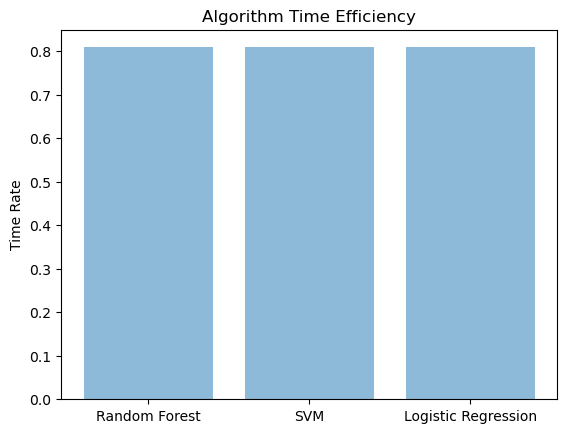

In [39]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('Random Forest','SVM','Logistic Regression')
y_pos = np.arange(len(objects))
performance = [rf_acc,ac,lr_acc]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Time Rate')
plt.title('Algorithm Time Efficiency')
 
plt.show()

In [40]:
import pickle
filename='stock market.sav'
pickle.dump(random_forest ,open('stock market.sav','wb'))
loaded_model=pickle.load(open('stock market.sav','rb'))